### We aim to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to predict revenue per customer.

Our goal:
1. Prove 80/20 rule in GStore
2. Giving recommendations based on top 3 feature importance on the revenue
3. Delivering strategies after figuring out Persona Canvas

### Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load and check data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


##### Notice that there are some columns with format JSON, therefore we need to flatten them
##### Resource: https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields/notebook

In [6]:
%%time
df_train = load_df()
df_test = load_df("test.csv")

Loaded train.csv. Shape: (903653, 55)
Loaded test.csv. Shape: (804684, 53)
CPU times: user 4min 39s, sys: 2min 10s, total: 6min 49s
Wall time: 7min 23s


In [ ]:
%%time
df_train.to_csv("train-flattened.csv", index=False)
df_test.to_csv("test-flattened.csv", index=False)

In [7]:
df_train.head(10)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google
5,Organic Search,20160902,2938943183656635653,2938943183656635653_1472807194,Not Socially Engaged,1472807194,1,1472807194,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
6,Organic Search,20160902,1905672039242460897,1905672039242460897_1472817241,Not Socially Engaged,1472817241,1,1472817241,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
7,Organic Search,20160902,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
8,Organic Search,20160902,4445454811831400414,4445454811831400414_1472805784,Not Socially Engaged,1472805784,1,1472805784,Internet Explorer,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
9,Organic Search,20160902,9499785259412240342,9499785259412240342_1472812272,Not Socially Engaged,1472812272,1,1472812272,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google


In [ ]:
df_train.info()

#### As we are predicting the natural log of the sum of all transactions per user, we first sum up the total transaction for each user

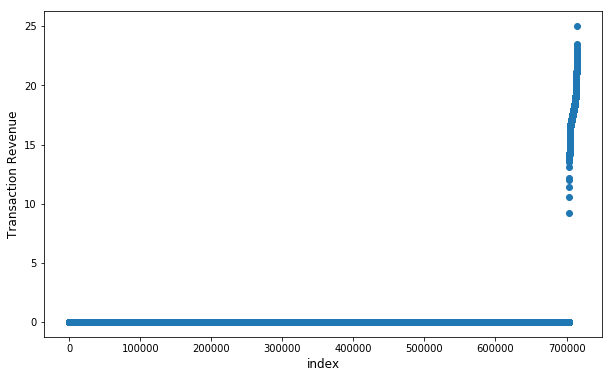

In [8]:
df_train['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].astype('float')
grouped = df_train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(range(grouped.shape[0]), np.sort(np.log1p(grouped["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('Transaction Revenue', fontsize=12)
plt.show()

<h4 style="color:red">This graph confirms the 80/20 rule that for many businesses only a small percentage of customers produce most of the revenue.</h4>

<h4>More clear if shown in ratio:</h4>

In [12]:
count = (df_train["totals.transactionRevenue"]>0).sum()
count_unique = (grouped["totals.transactionRevenue"]>0).sum()
print ("Number of entries with none zero revenue: ", count)
print ("Ratio between non zero entries and total entries: ", count/df_train.shape[0])
print ('-'*10)
print ("Number of unqiue customers with none zero revenue: ", count_unique)
print ("Ratio between non zero unique customers and total entries: ", count_unique/df_train.shape[0])

Number of entries with none zero revenue:  11515
Ratio between non zero entries and total entries:  0.0127427231470487
----------
Number of unqiue customers with none zero revenue:  9996
Ratio between non zero unique customers and total entries:  0.011061768178714617


In [13]:
non_unique = [c for c in df_train.columns if df_train[c].nunique(dropna=False)==1] # include NaN
non_unique

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

<h4>There are plenty of columns with constant value for every entry, we can simply drop those features since they make no influence to our outcome.</h4>

In [14]:
df_train[non_unique]

,socialEngagementType,device.browserSize,device.browserVersion,device.flashVersion,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.cityId,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,trafficSource.adwordsClickInfo.criteriaParameters
0,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset
1,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset
2,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset
3,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset
4,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset
5,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset
6,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not ava

In [15]:
df_train.shape[1]

55

In [16]:
df_train = df_train.drop(non_unique, axis=1)

In [13]:
df_train.shape[1]

36

<h2>Feature Analysis</h2>

<h5>We are going to draw some graphs to visualize the relation between different features and revenue.</h5>

<h3>Device</h3>

<h4 style="color:blue">Device Browser</h4>

In [ ]:
# df_train['device.browser']

In [14]:
df_train['device.browser'].unique()

array(['Chrome', 'Firefox', 'UC Browser', 'Internet Explorer', 'Safari',
       'Edge', 'Opera Mini', 'Opera', 'BlackBerry', 'Safari (in-app)',
       'Coc Coc', 'Mozilla Compatible Agent', 'ADM', 'MRCHROME',
       'Amazon Silk', 'YaBrowser', 'Android Webview', 'Puffin',
       'Nokia Browser', 'Maxthon', 'Nintendo Browser', 'Android Browser',
       'Lunascape', 'IE with Chrome Frame', 'ThumbSniper',
       'LYF_LS_4002_12', 'Mozilla', 'osee2unifiedRelease', 'NokiaE52-1',
       'Iron', '[Use default User-agent string] LIVRENPOCHE', '(not set)',
       'LYF_LS_4002_11', 'M5', 'Android Runtime', 'Apple-iPhone7C2',
       'SeaMonkey', 'Konqueror', 'Seznam', 'Changa 99695759', 'no-ua',
       'MQQBrowser', 'Nichrome', 'HTC802t_TD', 'DASH_JR_3G', 'DoCoMo',
       'subjectAgent: NoticiasBoom', 'YE', 'User Agent', '0',
       'Hisense M20-M_LTE', 'Reddit', 'TCL P500M', 'CSM Click'],
      dtype=object)

In [15]:
len(df_train['device.browser'].unique())

54

In [16]:
df_train['device.browser'].value_counts()

Chrome                                         620364
Safari                                         182245
Firefox                                         37069
Internet Explorer                               19375
Edge                                            10205
Android Webview                                  7865
Safari (in-app)                                  6850
Opera Mini                                       6139
Opera                                            5643
UC Browser                                       2427
YaBrowser                                        2096
Coc Coc                                           727
Amazon Silk                                       561
Android Browser                                   553
Mozilla Compatible Agent                          374
MRCHROME                                          263
Maxthon                                           246
BlackBerry                                        184
Nintendo Browser            

In [17]:
browser_group = df_train.groupby('device.browser')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
browser_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
browser_group['device browser'] = browser_group.index
browser_group = browser_group.sort_values(by="number of visitors", ascending=False)
browser_group.head(10)

,number of visitors,count of non-zero revenue,mean,device browser
device.browser,,,,
Chrome,620364,10353,1.335946e+08,Chrome
Safari,182245,780,6.717626e+07,Safari
Firefox,37069,191,4.676247e+08,Firefox
Internet Explorer,19375,109,7.573899e+07,Internet Explorer
Edge,10205,58,1.117753e+08,Edge
Android Webview,7865,6,1.914167e+07,Android Webview
Safari (in-app),6850,12,1.281417e+07,Safari (in-app)
Opera Mini,6139,0,NaN,Opera Mini
Opera,5643,5,4.307000e+07,Opera


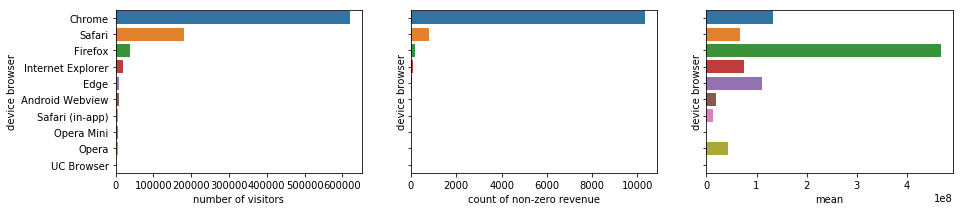

In [18]:
f, axes = plt.subplots(1, 3, figsize=(15,3), sharey='row')
sns.barplot(y="device browser",x="number of visitors",data=browser_group.head(10),ax=axes[0])
sns.barplot(y="device browser",x="count of non-zero revenue",data=browser_group.head(10),ax=axes[1])
sns.barplot(y="device browser",x="mean",data=browser_group.head(10),ax=axes[2])

<h4 style="color:blue">Device Category</h4>

In [19]:
df_train['device.deviceCategory'].value_counts()

desktop    664479
mobile     208725
tablet      30449
Name: device.deviceCategory, dtype: int64

In [20]:
device_group = df_train.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
device_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
device_group['device category'] = device_group.index
device_group = device_group.sort_values(by="number of visitors", ascending=False)

In [21]:
device_group

,number of visitors,count of non-zero revenue,mean,device category
device.deviceCategory,,,,
desktop,664479,10495,1.411019e+08,desktop
mobile,208725,852,5.843405e+07,mobile
tablet,30449,168,5.607940e+07,tablet


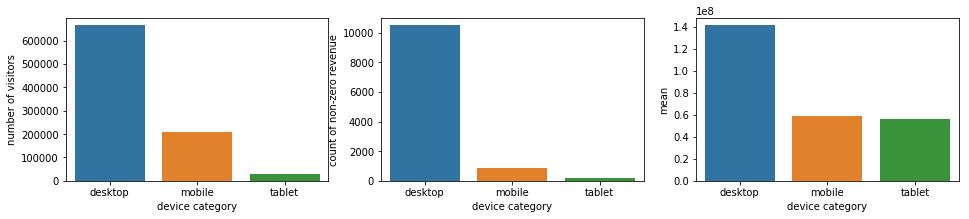

In [22]:
f, axes = plt.subplots(1, 3, figsize=(16,3))
sns.barplot(x="device category",y="number of visitors",data=device_group,ax=axes[0])
sns.barplot(x="device category",y="count of non-zero revenue",data=device_group,ax=axes[1])
sns.barplot(x="device category",y="mean",data=device_group,ax=axes[2])

<h4 style="color:blue">isMobile</h4>

In [23]:
isMobile_group = df_train.groupby('device.isMobile')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
isMobile_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
isMobile_group['isMobile'] = isMobile_group.index
isMobile_group = isMobile_group.sort_values(by="number of visitors", ascending=False)

In [24]:
isMobile_group

,number of visitors,count of non-zero revenue,mean,isMobile
device.isMobile,,,,
False,664530,10495,1.410988e+08,False
True,239123,1020,5.807805e+07,True


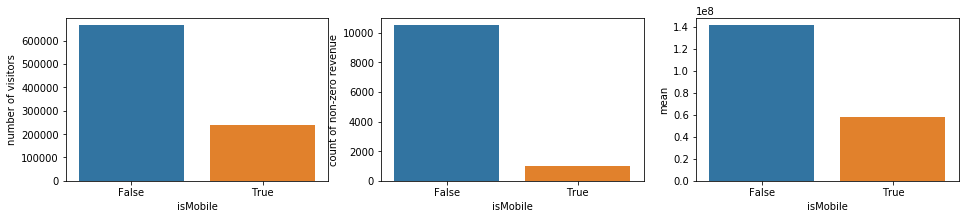

In [25]:
f, axes = plt.subplots(1, 3, figsize=(16,3))
sns.barplot(x="isMobile",y="number of visitors",data=isMobile_group,ax=axes[0])
sns.barplot(x="isMobile",y="count of non-zero revenue",data=isMobile_group,ax=axes[1])
sns.barplot(x="isMobile",y="mean",data=isMobile_group,ax=axes[2])

<h4 style="color:blue">Operating System</h4>

In [26]:
OS_group = df_train.groupby('device.operatingSystem')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
OS_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
OS_group['OS'] = OS_group.index
OS_group = OS_group.sort_values(by="number of visitors", ascending=False)

In [27]:
OS_group

,number of visitors,count of non-zero revenue,mean,OS
device.operatingSystem,,,,
Windows,350072,2309,1.720713e+08,Windows
Macintosh,253938,6426,1.332673e+08,Macintosh
Android,123892,467,7.781859e+07,Android
iOS,107665,536,4.135616e+07,iOS
Linux,35034,782,5.615141e+07,Linux
Chrome OS,26337,994,1.850480e+08,Chrome OS
(not set),4695,0,NaN,(not set)
Windows Phone,1216,1,2.640000e+07,Windows Phone
Samsung,280,0,NaN,Samsung


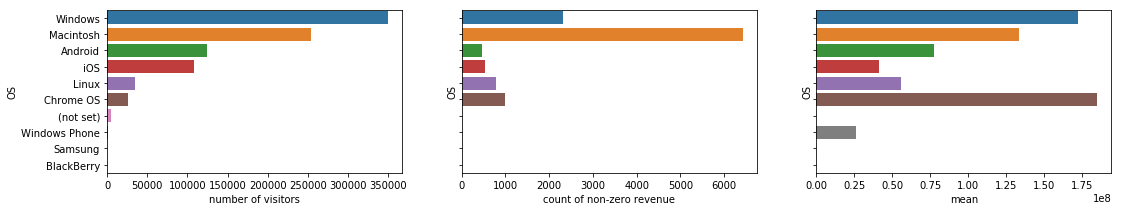

In [28]:
f, axes = plt.subplots(1, 3, figsize=(18,3), sharey='row')
sns.barplot(y="OS",x="number of visitors",data=OS_group.head(10),ax=axes[0])
sns.barplot(y="OS",x="count of non-zero revenue",data=OS_group.head(10),ax=axes[1])
sns.barplot(y="OS",x="mean",data=OS_group.head(10),ax=axes[2])

<h4 style="color:red">Inference from device:</h4>

<p>1. device browser: count and non-zero are similar, but mean varies</p>
<p>2. device category: three graphs are coherent, desktop > mobile > tablet</p>
<p>3. isMobile: clearly, non-mobile users > mobile users</p>
<p>4. operating system: windows counts for most count, Macintosh counts for most non-zero, Chrome wins in mean</p>

<h3>Date</h3>

In [29]:
# df_train.info()
df_train['date'][:5]

0    20160902
1    20160902
2    20160902
3    20160902
4    20160902
Name: date, dtype: int64

In [30]:
import datetime
df_train['date'] = df_train['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
date_group = df_train.groupby('date')['totals.transactionRevenue'].agg(['size', 'count'])
date_group.columns = ["number of visitors", "count of non-zero revenue"]
date_group['date'] = date_group.index

In [31]:
df_train['date'][:5]

0    2016-09-02
1    2016-09-02
2    2016-09-02
3    2016-09-02
4    2016-09-02
Name: date, dtype: object

Text(0,0.5,'count of non-zero revenue')

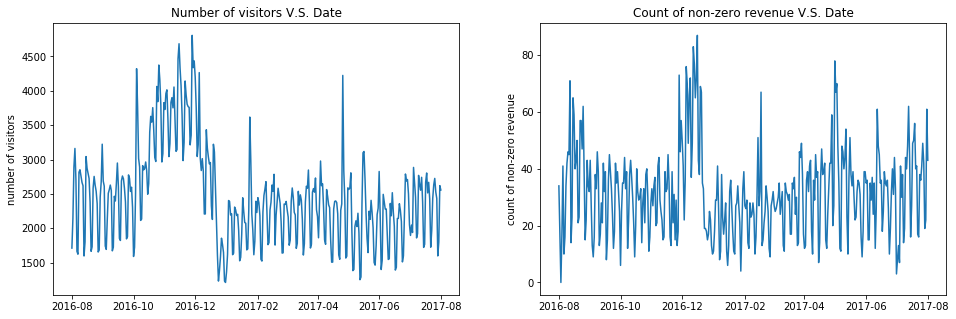

In [32]:
x1 = date_group['date']
x2 = x1
y1 = date_group['number of visitors']
y2 = date_group['count of non-zero revenue']
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(x1, y1)
plt.title('Number of visitors V.S. Date')
plt.ylabel('number of visitors')
plt.subplot(1, 2, 2)
plt.plot(x2, y2)
plt.title('Count of non-zero revenue V.S. Date')
plt.ylabel('count of non-zero revenue')

<h4 style="color:red">Inference from date:</h4>

<p>1. The range of date from the training set is August 01 2016 to July 31 2017.</p>
<p>2. Increase in number of visitor in 2016.8 and 2016.10 did not incur an increase in the revenue.</p>

In [33]:
df_test['date'] = df_test['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
test_date = df_test.groupby('date')['fullVisitorId'].size()

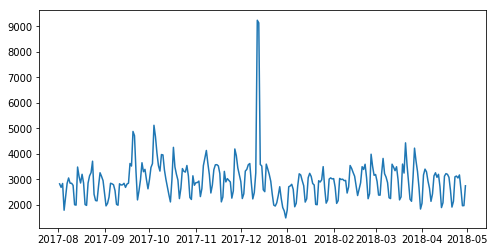

In [34]:
plt.figure(figsize=(8,4))m
plt.plot(test_date)

<h5 style="color:red">Notice that the datetime from test set has no overlap with training set.</h5>

<h3>Geo</h3>

<h4 style="color:blue">Continent</h4>

In [ ]:
# df_train.info()

In [35]:
df_train['geoNetwork.continent'].unique()

array(['Asia', 'Oceania', 'Europe', 'Americas', 'Africa', '(not set)'],
      dtype=object)

In [33]:
continent_group = df_train.groupby('geoNetwork.continent')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
continent_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
continent_group['continent'] = continent_group.index
continent_group = continent_group.sort_values(by="number of visitors", ascending=False)

In [34]:
continent_group

,number of visitors,count of non-zero revenue,mean,continent
geoNetwork.continent,,,,
Americas,450377,11283,1.333574e+08,Americas
Asia,223698,125,1.392147e+08,Asia
Europe,198311,79,8.540544e+07,Europe
Oceania,15054,14,1.280879e+08,Oceania
Africa,14745,8,1.085970e+09,Africa
(not set),1468,6,1.282967e+08,(not set)


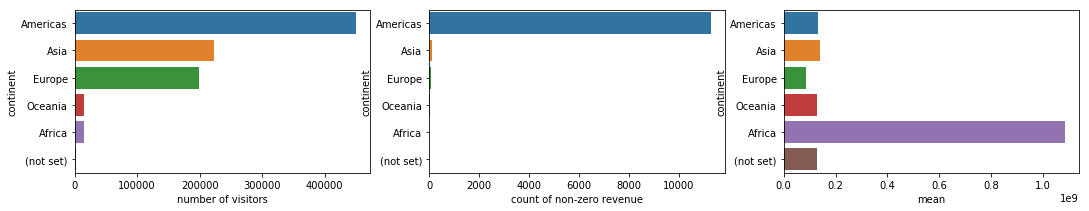

In [35]:
f, axes = plt.subplots(1, 3, figsize=(18,3))
sns.barplot(y="continent",x="number of visitors",data=continent_group,ax=axes[0])
sns.barplot(y="continent",x="count of non-zero revenue",data=continent_group,ax=axes[1])
sns.barplot(y="continent",x="mean",data=continent_group,ax=axes[2])

In [39]:
df_train['geoNetwork.subContinent'].unique()

array(['Western Asia', 'Australasia', 'Southern Europe', 'Southeast Asia',
       'Northern Europe', 'Southern Asia', 'Western Europe',
       'South America', 'Eastern Asia', 'Eastern Europe',
       'Northern America', 'Western Africa', 'Central America',
       'Eastern Africa', '(not set)', 'Caribbean', 'Southern Africa',
       'Northern Africa', 'Central Asia', 'Middle Africa', 'Melanesia',
       'Micronesian Region', 'Polynesia'], dtype=object)

In [36]:
subcontinent_group = df_train.groupby('geoNetwork.subContinent')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
subcontinent_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
subcontinent_group['subContinent'] = subcontinent_group.index
subcontinent_group = subcontinent_group.sort_values(by="number of visitors", ascending=False)

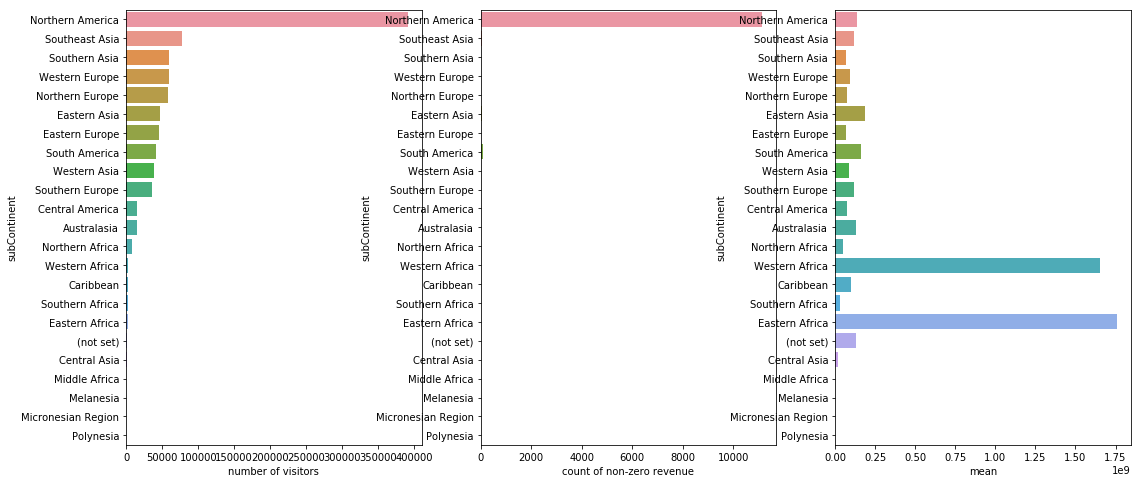

In [37]:
f, axes = plt.subplots(1, 3, figsize=(18,8))
sns.barplot(y="subContinent",x="number of visitors",data=subcontinent_group,ax=axes[0])
sns.barplot(y="subContinent",x="count of non-zero revenue",data=subcontinent_group,ax=axes[1])
sns.barplot(y="subContinent",x="mean",data=subcontinent_group,ax=axes[2])

<h4 style="color:red">Inference from geo location:</h4>

<p>1. At continent level, Amercian has higher number of visoitors and higher number non-zero revenue.</p>
<p>2. Though Asia and Europe and non-trivial number of visitors, but with little revenue created.</p>
<p>3. The above two points were further confirmed by the sunContinent plot.</p>

<h3>Page Info</h3>

<h4 style="color:blue">Page Views</h4>

In [38]:
pageViews_group = df_train.groupby('totals.pageviews')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
pageViews_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
pageViews_group['pageViews'] = pageViews_group.index
pageViews_group['pageViews'] = pageViews_group['pageViews'].astype(int)
pageViews_group = pageViews_group.sort_values(by="number of visitors", ascending=False)

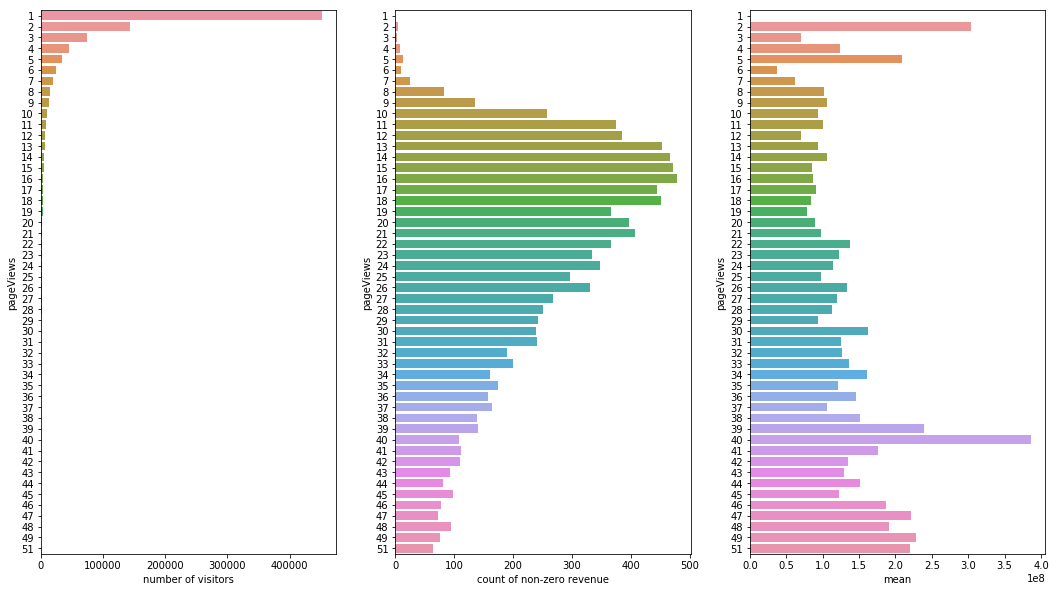

In [39]:
f, axes = plt.subplots(1, 3, figsize=(18,10))
sns.barplot(y="pageViews",x="number of visitors",data=pageViews_group.head(50),ax=axes[0],orient='h')
sns.barplot(y="pageViews",x="count of non-zero revenue",data=pageViews_group.head(50),ax=axes[1],orient='h')
sns.barplot(y="pageViews",x="mean",data=pageViews_group.head(50),ax=axes[2],orient='h')

<h4 style="color:blue">Hits</h4>

In [40]:
hits_group = df_train.groupby('totals.hits')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
hits_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
hits_group['hits'] = hits_group.index
hits_group['hits'] = hits_group['hits'].astype(int)
hits_group = hits_group.sort_values(by="number of visitors", ascending=False)
# hits_group

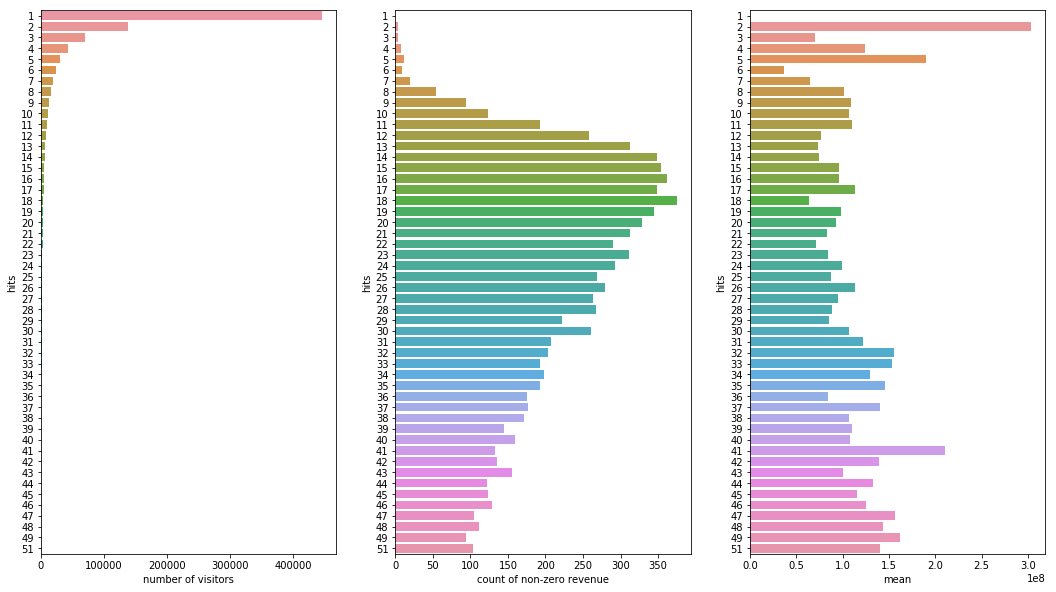

In [41]:
f, axes = plt.subplots(1, 3, figsize=(18,10))
sns.barplot(y="hits",x="number of visitors",data=hits_group.head(50),ax=axes[0],orient='h')
sns.barplot(y="hits",x="count of non-zero revenue",data=hits_group.head(50),ax=axes[1],orient='h')
sns.barplot(y="hits",x="mean",data=hits_group.head(50),ax=axes[2],orient='h')

<h5 style="color:red">Inference from page views:</h5>

<p>1. hight number of visitors for less page views and hits.</p>
<p>2. number of hits and number of visitors are negative related.</p>
<p>3. large amount of hits and pageviews around (10,20) has large non-zero revenue.</p>

<h3>Traffic Source</h3>

<h4 style="color:blue">Source</h4>

In [ ]:
# df_train.info()

In [42]:
trafficSource_group = df_train.groupby('trafficSource.source')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
trafficSource_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
trafficSource_group['trafficSource'] = trafficSource_group.index
trafficSource_group = trafficSource_group.sort_values(by="number of visitors", ascending=False)

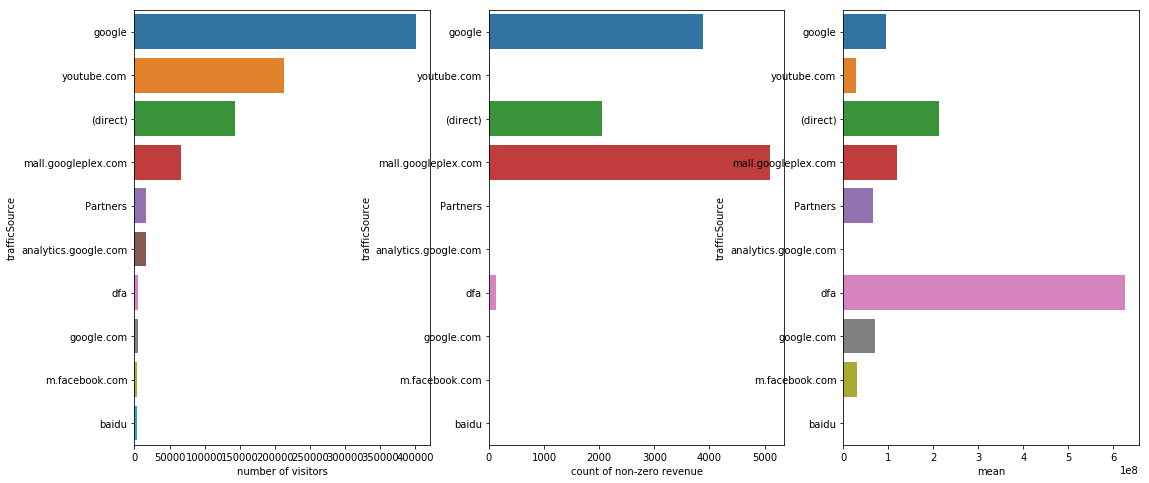

In [43]:
f, axes = plt.subplots(1, 3, figsize=(18,8))
sns.barplot(y="trafficSource",x="number of visitors",data=trafficSource_group.head(10),ax=axes[0])
sns.barplot(y="trafficSource",x="count of non-zero revenue",data=trafficSource_group.head(10),ax=axes[1])
sns.barplot(y="trafficSource",x="mean",data=trafficSource_group.head(10),ax=axes[2])

<h4 style="color:blue">Medium</h4>

In [44]:
medium_group = df_train.groupby('trafficSource.medium')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
medium_group.columns = ["number of visitors", "count of non-zero revenue", "mean"]
medium_group['medium'] = medium_group.index
medium_group = medium_group.sort_values(by="number of visitors", ascending=False)

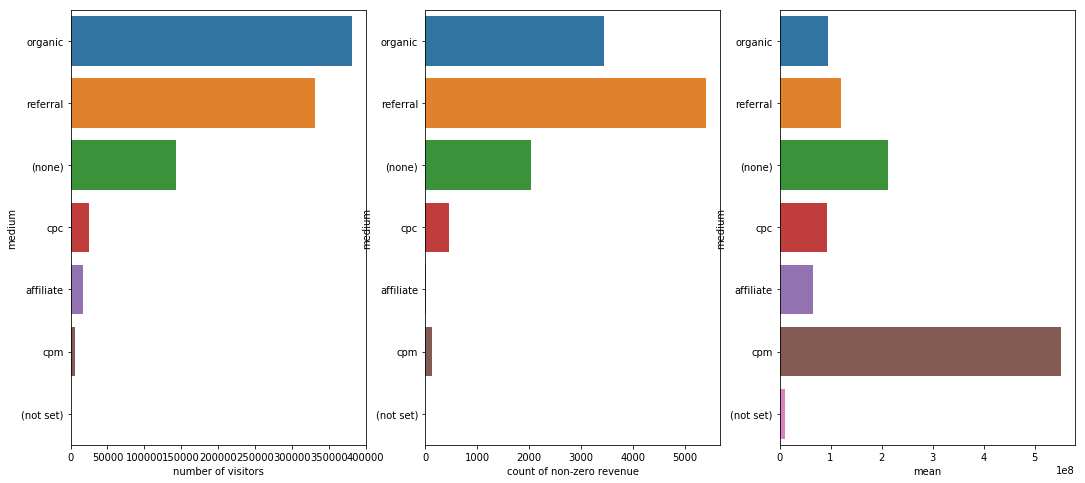

In [45]:
f, axes = plt.subplots(1, 3, figsize=(18,8))
sns.barplot(y="medium",x="number of visitors",data=medium_group,ax=axes[0])
sns.barplot(y="medium",x="count of non-zero revenue",data=medium_group,ax=axes[1])
sns.barplot(y="medium",x="mean",data=medium_group,ax=axes[2])

<h5 style="color:red">Inference from traffic source:</h5>

<p>1. Based on the source plot, Google has a high number of visitors and high revenue.</p>
<p>2. Based on the source plot, Youtube has relative large number of visitor however less revenue.</p>
<p>3. Based on the source plot, Google plex has a high ratio of non-zero revenue vs number of visitors.</p>
<p>4. Referral wins according to the medium plot.</p>

<h3>Baseline Model:</h3>

<h4>Join train and test set</h4>

In [50]:
# for categorical data
for col in ['trafficSource.keyword','trafficSource.referralPath','trafficSource.adContent',
           'trafficSource.adwordsClickInfo.gclId','trafficSource.adwordsClickInfo.adNetworkType',
           'trafficSource.adwordsClickInfo.slot']:
    dataset[col].fillna('unknown', inplace=True)
    
# fillna numerical data will most frequent
dataset['totals.pageviews'].fillna(dataset['totals.pageviews'].mode()[0], inplace=True)
dataset['totals.newVisits'].fillna(dataset['totals.newVisits'].mode()[0], inplace=True)
dataset['totals.bounces'].fillna(dataset['totals.bounces'].mode()[0], inplace=True)
dataset['trafficSource.adwordsClickInfo.page'].fillna(dataset['trafficSource.adwordsClickInfo.page'].mode()[0], inplace=True)

# fillna boolean feature
dataset['trafficSource.isTrueDirect'].fillna(False, inplace=True)
dataset['trafficSource.adwordsClickInfo.isVideoAd'].fillna(False, inplace=True)

In [46]:
from sklearn import preprocessing

cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df_train[col].values.astype('str')) + list(df_test[col].values.astype('str')))
    df_train[col] = lbl.transform(list(df_train[col].values.astype('str')))
    df_test[col] = lbl.transform(list(df_test[col].values.astype('str')))

    num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
    df_train[col] = df_train[col].astype(float)
    df_test[col] = df_test[col].astype(float)

channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


In [49]:
train_len = len(df_train)
dataset =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)
# all_data = train.append(test, sort=False).reset_index(drop=True)

<h4>check for null and missing values</h4>

In [47]:
null_cnt = df_train.isnull().sum().sort_values()
print(null_cnt[null_cnt > 0])

totals.pageviews                 100
totals.newVisits              200593
totals.bounces                453023
totals.transactionRevenue     892138
trafficSource.campaignCode    903652
dtype: int64


In [ ]:
# df_train.info()

In [51]:
set(df_train.columns).difference(set(df_test.columns))

{'totals.transactionRevenue', 'trafficSource.campaignCode'}

In [52]:
dataset = dataset.drop(non_unique+['trafficSource.campaignCode', 'sessionId'], axis=1)

In [53]:
dataset.shape[1]

34

In [54]:
# separate train and test dataset
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["totals.transactionRevenue"],axis = 1,inplace=True)

In [55]:
test.shape

(804684, 33)

In [56]:
# separate train features and labels
train['totals.transactionRevenue'].fillna(0, inplace=True)
train['totals.transactionRevenue'] = np.log1p(train['totals.transactionRevenue'].astype(float))

train_id = train['fullVisitorId']
test_id = test['fullVisitorId']

In [58]:
from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

In [68]:
df_train["totals.transactionRevenue"].fillna(0, inplace=True)
dev = df_train[df_train['date']<=datetime.date(2017,5,31)]
val = df_train[df_train['date']>datetime.date(2017,5,31)]
dev_y = np.log1p(dev["totals.transactionRevenue"].values)
val_y = np.log1p(val["totals.transactionRevenue"].values)

dev_X = dev[cat_cols + num_cols] 
val_X = val[cat_cols + num_cols] 
test_X = df_test[cat_cols + num_cols] 

In [69]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : 1,
        'random_state':42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.69762
[200]	valid_0's rmse: 1.69347
Early stopping, best iteration is:
[180]	valid_0's rmse: 1.69255


<h3>Feature Importance</h3>

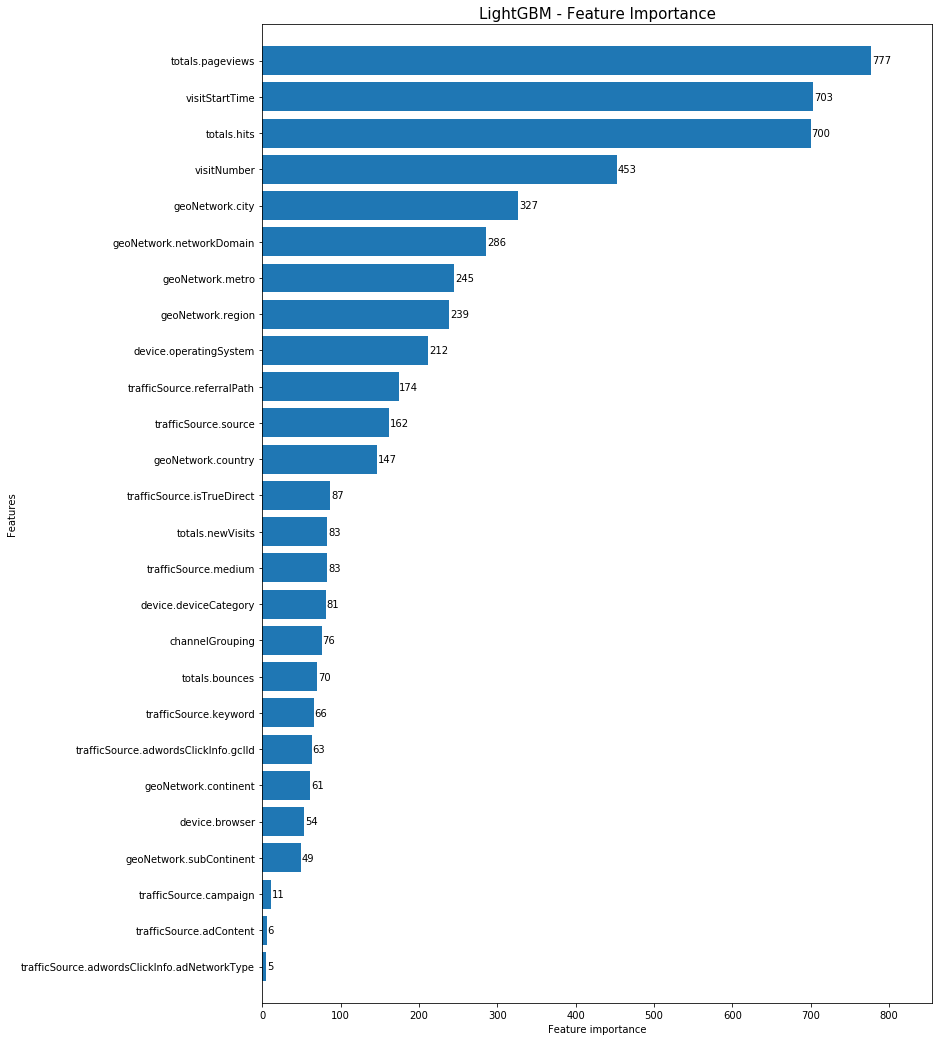

In [70]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(12,18))
lgb.(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [71]:
sub_df = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df["PredictedRevenue"] = np.expm1(sub_df["PredictedLogRevenue"])
# sub_df.to_csv("submission.csv", index=False)

In [72]:
sub_df

,fullVisitorId,PredictedLogRevenue,PredictedRevenue
0,0000000259678714014,0.890722,1.436888
1,0000049363351866189,0.001738,0.001740
2,0000053049821714864,0.000000,0.000000
3,0000059488412965267,0.214785,0.239596
4,0000085840370633780,0.096668,0.101495
5,0000091131414287111,0.004116,0.004124
6,0000117255350596610,7.115214,1229.547481
7,0000118334805178127,0.000000,0.000000
8,0000130646294093000,0.066911,0.069201
9,0000150005271820273,0.003615,0.003621
